# ggplot 610 - small multiples with facet grid

This notebook presents a little study to put the use of facet_grid() in a natural context.   
Second, it shows how plots can be used to answer research questions.  
Finally it demonstrates how many of the previously covered techniques can be used together.

Facet_grid() puts a number of similar plots in a grid.  
Facet_grid implements the [small multiple](https://en.wikipedia.org/wiki/Small_multiple) concept for plots that vary on two variables.  
Such grids are useful to show how two variables interact.  

The demonstration of facet_grid can be found in section 5 near the end of this notebook.

# 0 - setup notebook

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from plotnine import * 

# 1 - get some data 

In [3]:
hdi = pd.read_csv('./dat/country.csv', index_col=0 )
print(hdi.shape)
hdi.head()

(113, 6)


,region,country,HDI,trust,demo,HDI_cat
1,Southern Europe,Albania,0.749,51.2,5.67,M
2,Northern Africa,Algeria,0.713,38.6,3.83,M
4,South America,Argentina,0.811,40.4,6.84,H
5,Western Asia,Armenia,0.729,21.2,4.09,M
6,Oceania,Australia,0.938,103.6,9.22,H


### data dictionary

- HDI: human development index [0, 1]
- HDI_cat: HDI category Low, Medium, High [L,M,H]
- trust: trust in others [0, 150]
- demo: democracy index [0, 10] higher is more democratic


The table contains data for 113 countries in 18 regions of the world ('Southern Europe', 'Northern Africa', 'South America' etc.).  
The demo variable measures the extent of democracy in a country (Democracy Index 2012 of The Economist Intelligence Unit)  
The [trust](http://wikiprogress.org/articles/society-and-culture/trust/) variable measures trust in others (0=no trust in other, 150=total trust).  

## research questions

Question 1 - Is more democracy associated with more trust (is there a positive correlation between democracy and trust)?  

Question 2 - Is the association between democracy and trust different for different continents?  
(The continent being: Africa, America, Asia and Europe) 

Question 3 - Is the association different for high, medium and low developed countries?  

The human development index ([HDI](https://en.wikipedia.org/wiki/Human_Development_Index)) will measure development.   
Our data has a variable HDI_cat that gives the level of development of each country as Low, Medium or High.    
Our data has no variable continent, however we can derive the continent from region.


### derive continent from region

First lets list which regions we have.

In [4]:

hdi['region'].unique()

array(['Southern Europe', 'Northern Africa', 'South America',
       'Western Asia', 'Oceania', 'Western Europe', 'Southern Asia',
       'Eastern Europe', 'Western Africa', 'Southern Africa',
       'South-Eastern Asia', 'Northern America', 'Eastern Asia',
       'Central America', 'Northern Europe', 'Caribbean', 'Eastern Africa',
       'Central Asia'], dtype=object)

In [22]:
# --- construct the variable continent ----------------
def get_continent(region):
    if   region.find('Europe'   ) > 0 : return 'Europe'
    elif region.find('Africa'   ) > 0 : return 'Africa'
    elif region.find('America'  ) > 0 : return 'America'
    elif region.find('Asia'     ) > 0 : return 'Asia'
    else: return None
    
hdi['continent'] = hdi['region'].apply(get_continent)

#--- remove all cases where continent=None ----
hdi = hdi.dropna(axis=0,how='any')

#--- show result -------------------
print(hdi.shape)
hdi.head()

(110, 8)


,region,country,HDI,trust,demo,HDI_cat,continent,HDI_cat_ordinal
1,Southern Europe,Albania,0.749,51.2,5.67,M,Europe,bM
2,Northern Africa,Algeria,0.713,38.6,3.83,M,Africa,bM
4,South America,Argentina,0.811,40.4,6.84,H,America,cH
5,Western Asia,Armenia,0.729,21.2,4.09,M,Asia,bM
7,Western Europe,Austria,0.895,70.2,8.62,H,Europe,cH


Of the 113 countries 110 are on one of our four continents.

# 2 - the association between democracy and trust
Lets look at the association between democracy and trust.

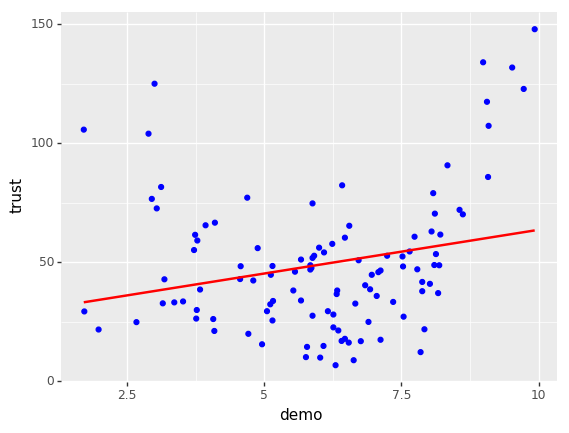

<ggplot: (14409785)>

In [6]:
ggplot(data=hdi, mapping=aes(x='demo', y='trust')) + \
    geom_point(color='blue') + \
    geom_smooth(method='lm', se=False, color='red')

Our expectation that more democracy is associated with higher trust appears to be confirmed, the red trend-line has a positive slope.  
However the relationship does not appear to be linear. Lets try a curved line.   

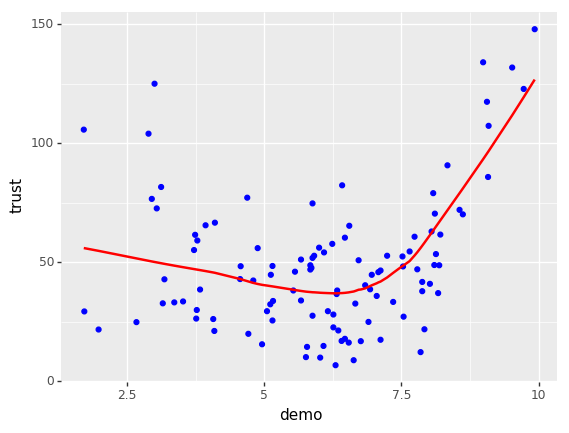

<ggplot: (-9223372036840365964)>

In [7]:
ggplot(data=hdi, mapping=aes(x='demo', y='trust')) + \
    geom_point(color='blue') + \
    geom_smooth(method='lowess', se=False, color='red')

The answer to our first question is that there is no simple linear association between democracy and trust.

# 3 - differences between continents

Lets see how the different continents score.

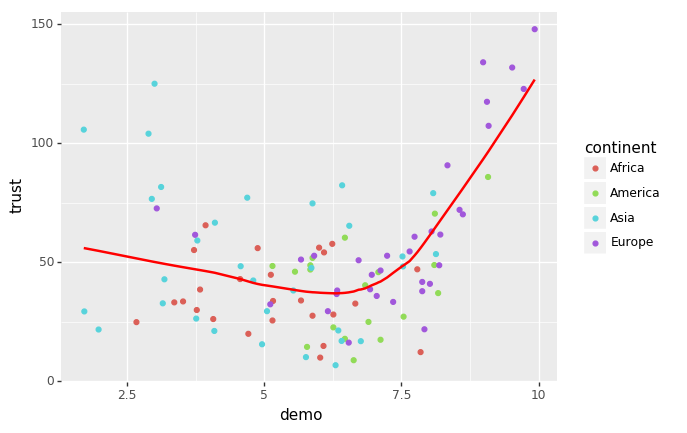

<ggplot: (-9223372036840330373)>

In [8]:
ggplot(data=hdi, mapping=aes(x='demo', y='trust', color='continent')) + \
    geom_point() + \
    geom_smooth(method='lowess', se=False, color='red') 

Lets show a lowess curve for each continent.   
(Just remove the color='red' from the geom, to produce a lowess line for each color-group)

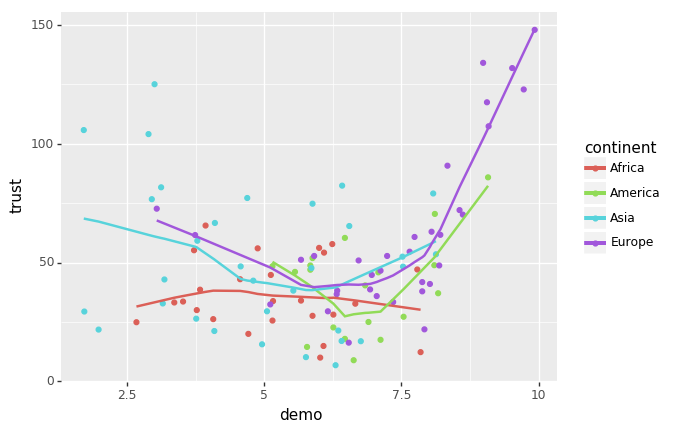

<ggplot: (14504438)>

In [9]:
ggplot(data=hdi, mapping=aes(x='demo', y='trust', color='continent')) + \
    geom_point() + \
    geom_smooth(method='lowess', se=False)

Lets remove the points to get a a less cluttered picture.

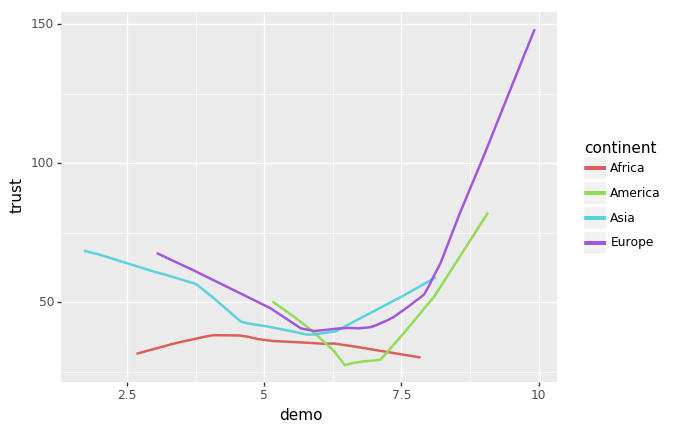

<ggplot: (-9223372036840160887)>

In [10]:
ggplot(data=hdi, mapping=aes(x='demo', y='trust', color='continent')) + \
    geom_smooth(method='lowess', se=False)

America, Asia and Europe appear to have the same U shaped relationship between democracy and trust.  
Medium levels of democracy (between 2.5 and 7.5) are associated with low trust.  
From say a democracy level of 7.5 Higher democracy is indeed associated with higher trust.  
For democracy levels below 7.5 there appears to be a negative association between both variables.

Africa is different. Democracy and trust appear to be unrelated.

So, the answer on our second question is that Africa is different, but the other continent appear to have the same relationship between democracy and trust.

# 4 - the effect of human development 

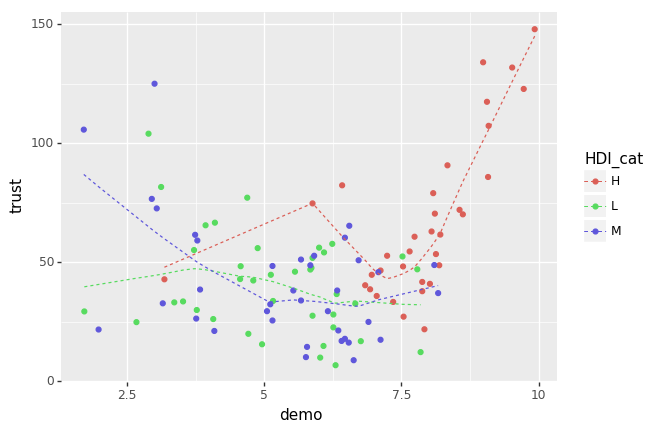

<ggplot: (14804428)>

In [11]:
ggplot(data=hdi, mapping=aes(x='demo', y='trust', color='HDI_cat')) + \
    geom_point() + \
    geom_smooth(method='lowess', se=False, size=0.5, linetype='dotted')

For the low and medium HDI category the relationship is more or less linear.  

The three red countries that score lowest on democracy appear to be anomalies.  
Lets check which countries that are.

In [12]:
from pandasql import sqldf

anomalies = sqldf("""
    SELECT *
    FROM hdi
    WHERE HDI_cat='H' AND demo < 6.5
    ORDER BY demo
""")

anomalies.head(10)

,region,country,HDI,trust,demo,HDI_cat,continent
0,Western Asia,Qatar,0.834,42.9,3.18,H,Asia
1,South-Eastern Asia,Singapore,0.895,74.8,5.88,H,Asia
2,Eastern Asia,Hong Kong SAR (China),0.906,82.4,6.42,H,Asia


All three are benign autocracies that govern with the consent of their people.  
Lets remove these three as anomalies that muddle up the trend.  
(i.e. create a new dataframe hdi2 without these anomalies)

In [23]:
hdi2  = sqldf("""
    SELECT *
    FROM hdi
    WHERE country NOT IN (SELECT country FROM anomalies)
""")

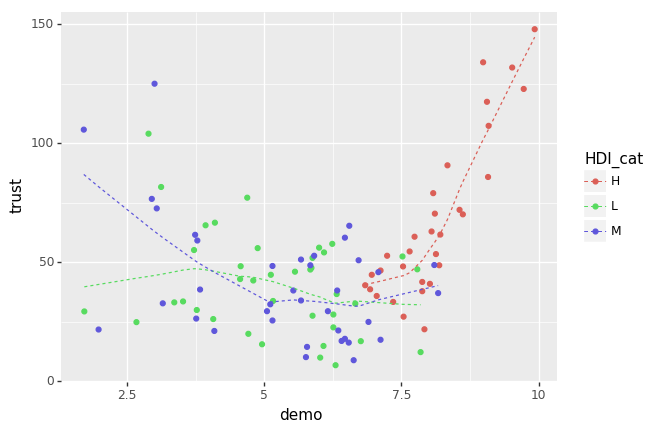

<ggplot: (14447929)>

In [14]:
# --- show the plot again for the "cleaned" data ---------------
ggplot(data=hdi2, mapping=aes(x='demo', y='trust', color='HDI_cat')) + \
    geom_point() + \
    geom_smooth(method='lowess', se=False, size=0.5, linetype='dotted')

The general trend can be captured by three straight lines.

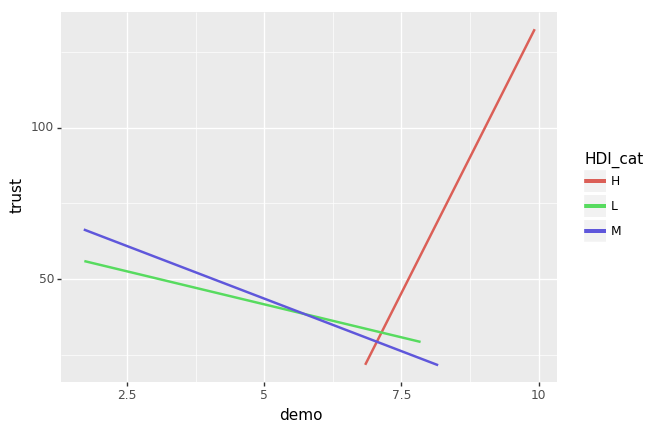

<ggplot: (15402504)>

In [15]:
ggplot(data=hdi2, mapping=aes(x='demo', y='trust', color='HDI_cat')) + \
    geom_smooth(method='lm', se=False) 

The blue and the green lines are almost identical, lets merge the M and L categories.

In [16]:
def get_HDI_cat_new(oldCat):
    if   oldCat == "H": return "H"
    elif oldCat == "M": return "ML"
    elif oldCat == "L": return "ML"

hdi2["HDI_cat_new"] = hdi2["HDI_cat"].apply(get_HDI_cat_new)

hdi2.head()

,region,country,HDI,trust,demo,HDI_cat,continent,HDI_cat_new
0,Southern Europe,Albania,0.749,51.2,5.67,M,Europe,ML
1,Northern Africa,Algeria,0.713,38.6,3.83,M,Africa,ML
2,South America,Argentina,0.811,40.4,6.84,H,America,H
3,Western Asia,Armenia,0.729,21.2,4.09,M,Asia,ML
4,Western Europe,Austria,0.895,70.2,8.62,H,Europe,H


Now lets plot the relationship  again.

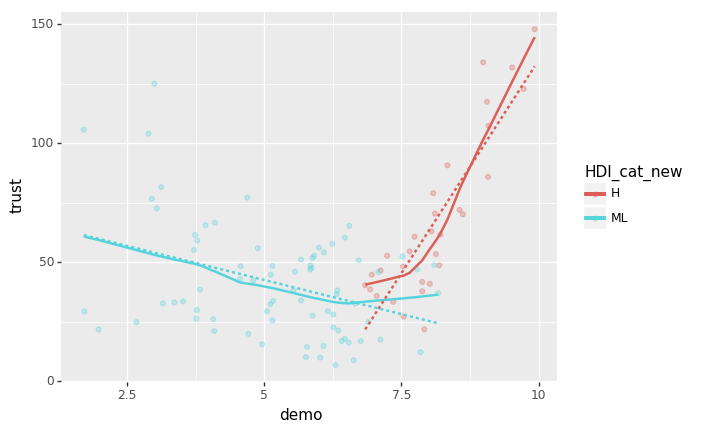

<ggplot: (-9223372036839348592)>

In [17]:
ggplot(data=hdi2, mapping=aes(x='demo', y='trust', color='HDI_cat_new')) + \
    geom_point(alpha=0.3) + \
    geom_smooth(method='lowess', se=False) + \
    geom_smooth(method='lm'    , se=False, linetype='dotted') 

The two straight lines capture the general pattern quite well.

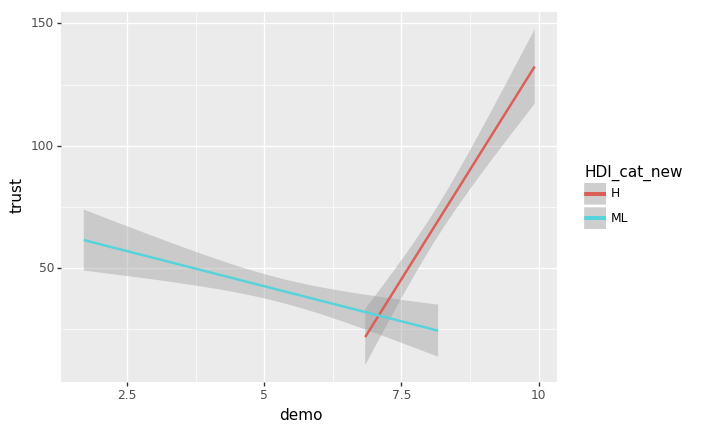

<ggplot: (-9223372036839294727)>

In [18]:
ggplot(data=hdi2, mapping=aes(x='demo', y='trust', color='HDI_cat_new')) + \
    geom_smooth(method='lm', se=True)

The answer to our third question shows a surprisingly clear pattern.

For low and middle HDI countries there is a negative linear relation between democracy and trust.  
After removing anomalies, the high HDI countries show a steep positive linear relationship.

# 5 - use facet_grid() to check for interaction effects 

Here we will create one plot for each combination of values of continent and HDI_cat.  
Facet_grid() is an ideal tool to use for this.

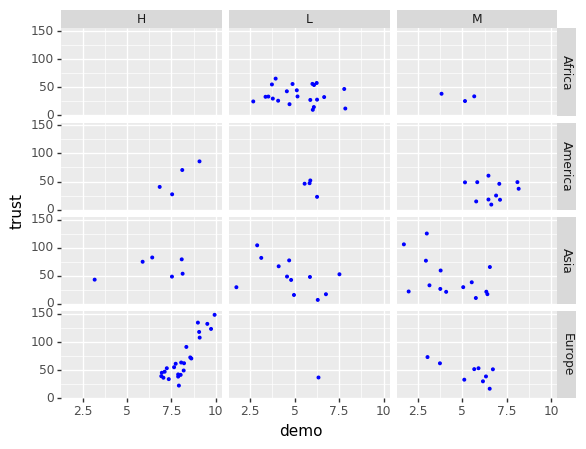

<ggplot: (14537757)>

In [19]:
ggplot(data=hdi, mapping=aes(x='demo', y='trust')) + \
    geom_point(color='blue', size=0.6) + \
    facet_grid(facets=['continent', 'HDI_cat'])

## problem
The order H,L,M (High, Low, Medium) should be L,M,H.  
Plotnine does not recognize HDI_cat as an ordinal variable and handles it as nominal.   
Plotnine puts the values of nominal variables in alphabetical order, that is not the order we need.  

The only way to fix this is to rename the values (i.e. put them are in the right order by brute force). 

In [20]:
#--- change H into cH, L into aL and M into bM
def get_new_HDI_cat_value(HDI_cat):
    if   HDI_cat == 'H' : return 'cH'
    elif HDI_cat == 'M' : return 'bM'
    elif HDI_cat == 'L' : return 'aL'
    else: return None

hdi['HDI_cat_ordinal'] = hdi['HDI_cat'].apply(get_new_HDI_cat_value) 

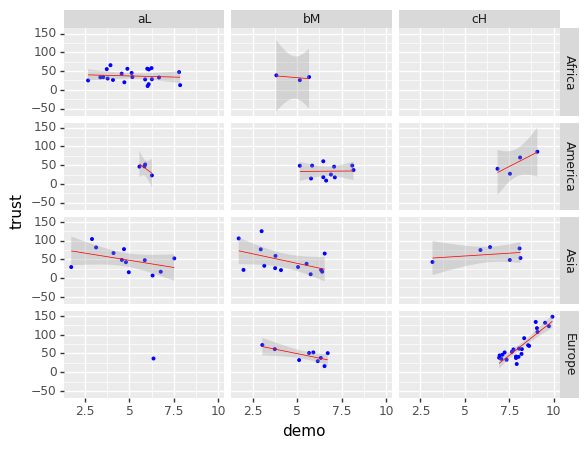

<ggplot: (14694699)>

In [21]:
ggplot(data=hdi, mapping=aes(x='demo', y='trust')) + \
    geom_point(color='blue', size=0.6) + \
    geom_smooth(method='lm', color='red', alpha=0.3, size=0.3) + \
    facet_grid(facets=['continent', 'HDI_cat_ordinal'])

The neat pattern we found in section 4 partly disappears when we control for the interaction effects.

The steep positive relationship for high development countries is mainly due to the many European countries in this category.  
The shallow negative relationship can be attributed to Asian and European Low and middle HDI countries.  
Others show mainly a flat relationship, democracy and trust are not associated in these cases.

# Aesthetics of facet_grid()

facet_wrap has as properties:

- facets=... ---- categorical variable use to separate on
- nrow= ... ----- number of rows in the output
- ncol= ... ----- number of columns in the output  
For more see the appendix below
 
**Note** color, linetype and size do not work.

# 6 -  How to zoom in on one of the sub-plots

It is easy to "zoom-in" on each of the 12 sub-plots.   
For example we can show the plot for the American high HDI countries.

In [65]:
AmericaHigh = sqldf("""
    SELECT *
    FROM hdi
    WHERE continent='America' AND HDI_cat_ordinal='cH'
""")

AmericaHigh

,region,country,HDI,trust,demo,HDI_cat,continent,HDI_cat_ordinal
0,South America,Argentina,0.811,40.4,6.84,H,America,cH
1,Northern America,Canada,0.911,85.9,9.08,H,America,cH
2,South America,Chile,0.819,27.2,7.54,H,America,cH
3,Northern America,United States of America,0.937,70.5,8.11,H,America,cH


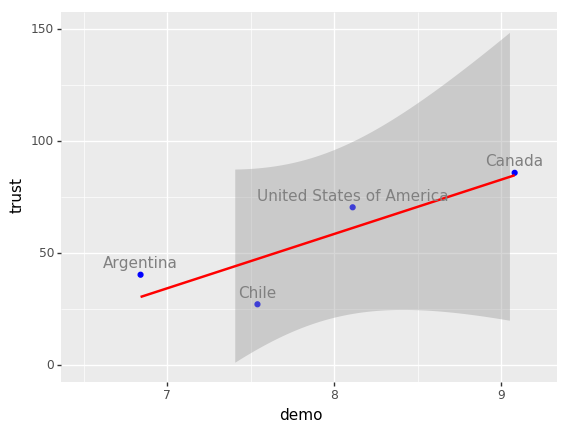

<ggplot: (-9223372036840036548)>

In [66]:
ggplot(data=AmericaHigh, mapping=aes(x='demo', y='trust', label='country')) + \
    geom_point(color='blue') + \
    geom_smooth(method='lm', color='red', se=True) + \
    geom_text(aes(x='demo',y='trust+5'), color='gray') + \
    xlim([6.5,9.2]) + ylim([0,150])

It is not clear why the se is not extended to Argentina  
(are there to few data points to calculate the se?)

# 7 - playtime: Getting to Denmark

The American political philosopher Francis Fukuyama, uses Denmark as an example of a country that does things right.  
He coined the phrase [getting to Denmark](https://evolution-institute.org/blog/getting-to-norway/).  
According to him all countries should strive to become as civilized as Denmark, Sweden and Norway.  

Let's see how close the American high HDI countries are to this Nordic ideal.  

But first lets see which are in 2012 the top 10 HDI countries.

In [61]:
orderedHDI = sqldf("SELECT * FROM hdi ORDER BY HDI DESC")

orderedHDI.head(10)

,region,country,HDI,trust,demo,HDI_cat,continent,HDI_cat_ordinal
0,Northern Europe,Norway,0.955,148.0,9.93,H,Europe,cH
1,Northern America,United States of America,0.937,70.5,8.11,H,America,cH
2,Western Europe,Netherlands,0.921,134.1,8.99,H,Europe,cH
3,Western Europe,Germany,0.920,90.8,8.34,H,Europe,cH
4,Northern Europe,Ireland,0.916,72.1,8.56,H,Europe,cH
5,Northern Europe,Sweden,0.916,122.9,9.73,H,Europe,cH
6,Western Europe,Switzerland,0.913,107.4,9.09,H,Europe,cH
7,Eastern Asia,Japan,0.912,79.1,8.08,H,Asia,cH
8,Northern America,Canada,0.911,85.9,9.08,H,America,cH
9,Eastern Asia,Korea. Republic,0.909,53.5,8.13,H,Asia,cH


Denmark has dropped out op the top 10, but Norway and Sweden are still there.  
The USA does not do badly on HDI either, it has the second highest score, Canada is also in the top 10. 

Lets see how the high HDI American countries score on our trust_by_democracy line.

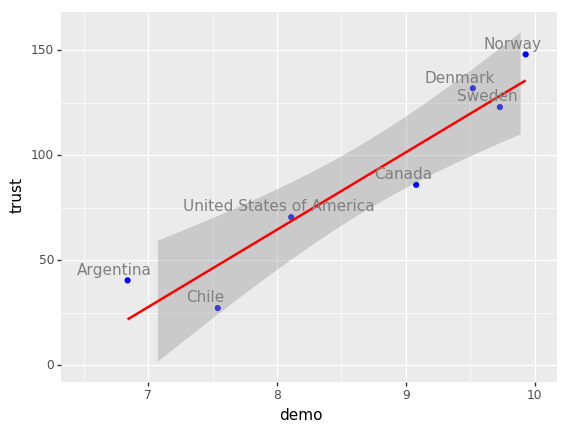

<ggplot: (-9223372036839695174)>

In [72]:
# --- extend our data with those of Norway, Denmark and Sweden--------.
AmericaHighExt = sqldf("""
    SELECT *
    FROM hdi
    WHERE (continent='America' AND HDI_cat_ordinal='cH') 
          OR country IN ('Sweden', 'Norway','Denmark')
""")

# --- show the new plot ---------------------------
ggplot(data=AmericaHighExt, mapping=aes(x='demo', y='trust', label='country')) + \
    geom_point(color='blue') + \
    geom_smooth(method='lm', color='red', se=True) + \
    geom_text(aes(x='demo-0.1',y='trust+5'), color='gray') + \
    xlim([6.5,10]) + ylim([0,160])

The first thing to notice is that countries do cluster close to the trend line.  
So, the plot does not make mockery of Fukuyama's idea that there is trend towards becoming "Denmark".

On our measure the USA is closer to Chile and Argentina than to Norway and Denmark.  
Should the USA show a little more ambition?

## Appendix - the docstring of the plotnine function facet_grid()

    """
    
     Parameters
    ----------
    facets : formula | tuple | list
        A formula with the rows (of the tabular display) on
        the LHS and the columns (of the tabular display) on
        the RHS; the dot in the formula is used to indicate
        there should be no faceting on this dimension
        (either row or column). If a tuple/list is used, it
        must of size two, the elements of which must be
        strings or lists.
    scales : 'fixed' | 'free' | 'free_x' | 'free_y'
        Whether ``x`` or ``y`` scales should be allowed (free)
        to vary according to the data on each of the panel.
        Default is ``'fixed'``.
    space : 'fixed' | 'free' | 'free_x' | 'free_y'
        Whether the ``x`` or ``y`` sides of the panels
        should have the size. It also depends to the
        ``scales`` parameter. Default is ``'fixed'``.
        This setting is not properly supported at the moment.
    shrink : bool
        Whether to shrink the scales to the output of the
        statistics instead of the raw data. Default is ``True``.
    labeller : str | function
        How to label the facets. If it is a ``str``, it should
        be one of ``'label_value'`` ``'label_both'`` or
        ``'label_context'``. Default is ``'label_value'``
    as_table : bool
        If ``True``, the facets are laid out like a table with
        the highest values at the bottom-right. If ``False``
        the facets are laid out like a plot with the highest
        value a the top-right. Default it ``True``.
    drop : bool
        If ``True``, all factor levels not used in the data
        will automatically be dropped. If ``False``, all
        factor levels will be shown, regardless of whether
        or not they appear in the data. Default is ``True``.
    """